In [1]:
import pandas as pd

posts = pd.read_csv('post_img_polarity_prob.csv.gz')
len(posts), posts.columns

(17826,
 Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'funct', 'pronoun',
        'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'verb',
        'auxverb', 'past', 'present', 'future', 'adverb', 'preps', 'conj',
        'negate', 'quant', 'number', 'swear', 'social', 'family', 'friend',
        'humans', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad',
        'cogmech', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'inhib',
        'incl', 'excl', 'percept', 'see', 'hear', 'feel', 'bio', 'body',
        'health', 'sexual', 'ingest', 'relativ', 'motion', 'space', 'time',
        'work', 'achieve', 'leisure', 'home', 'money', 'relig', 'death',
        'assent', 'nonfl', 'filler', 'post.id', 'blog.id', 'polarity',
        'img_polarity', 'img', 'wc'],
       dtype='object'))

In [2]:
posts[['polarity','img_polarity']].head(5)

,polarity,img_polarity
0,0.0,[0.17775923 0.48895797 0.33328274]
1,0.0,[0.24666864 0.22973323 0.52359813]
2,0.0,[0.24666864 0.22973323 0.52359813]
3,0.0,[0.1324832 0.57789314 0.28962368]
4,0.0,[0.03562151 0.60498923 0.3593892 ]


In [3]:
import numpy as np

def max_polarity_idx(post):
    try:
        polarities = post['img_polarity'].replace('[','').replace(']','').split(' ')
        polarities_f = [float(i) for i in polarities]
        for i,v in enumerate(polarities_f):
            if v == np.amax(polarities_f):
                return i
    except:
        return -1

def max_polarity_val(post):
    try:
        polarities = post['img_polarity'].replace('[','').replace(']','').split(' ')
        polarities_f = [float(i) for i in polarities]
        for i,v in enumerate(polarities_f):
            if v == np.amax(polarities_f):
                return v
    except:
        return 0

posts['img_max_polarity_idx'] = posts.apply(max_polarity_idx, axis=1)
posts['img_max_polarity_val'] = posts.apply(max_polarity_val, axis=1)

In [4]:
posts.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,funct,pronoun,ppron,i,we,you,shehe,...,nonfl,filler,post.id,blog.id,polarity,img_polarity,img,wc,img_max_polarity_idx,img_max_polarity_val
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7930337763964362012,1600009401538636752,0.0,[0.17775923 0.48895797 0.33328274],4.bp.blogspot.com/-jVYHG0R0D-k/WH_-a2UXwbI/AAA...,0,1,0.488958
1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4761201206458687372,1600009401538636752,0.0,[0.24666864 0.22973323 0.52359813],4.bp.blogspot.com/-3EoATnT89Xs/WH_9ScXDzoI/AAA...,0,2,0.523598
2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1297033737519073131,1600009401538636752,0.0,[0.24666864 0.22973323 0.52359813],2.bp.blogspot.com/-3AQ5yrUxmUc/WH__GFMFyMI/AAA...,0,2,0.523598
3,3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3752176386259709592,1600009401538636752,0.0,[0.1324832 0.57789314 0.28962368],3.bp.blogspot.com/-s41H9n3wkHI/WHglRcxd2yI/AAA...,0,-1,0.000000
4,4,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,366122772010640534,1600009401538636752,0.0,[0.03562151 0.60498923 0.3593892 ],2.bp.blogspot.com/-Rz9EONHW5Ro/WIKVE-yBqiI/AAA...,0,-1,0.000000


In [5]:
posts = posts[posts['wc'] > 0]

def relative_polarity(post):
    return post['polarity'] / post['wc']

posts['relative_polarity'] = posts.apply(relative_polarity, axis=1)

In [51]:
posts_sel = posts[posts['img_max_polarity_val'] >= 0.40]
posts_sel = posts_sel[posts_sel['img_max_polarity_idx'] != 1]
posts_sel = posts_sel[posts_sel['wc'] > 10]
posts_sel = posts_sel[posts_sel['wc'] < 500]
posts_sel = posts_sel[posts_sel['affect'] > 2]
len(posts_sel), np.mean(posts_sel['wc'])

(1403, 189.61012116892374)

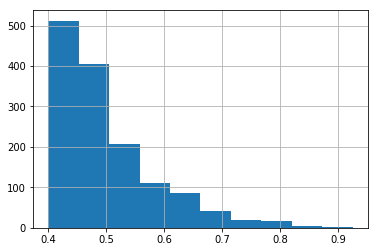

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline  
posts_sel['img_max_polarity_val'].hist()

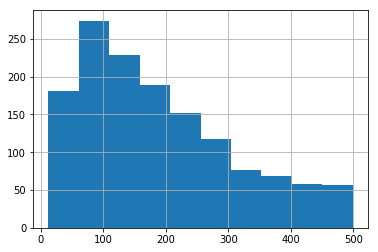

In [53]:
posts_sel['wc'].hist()

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

def polarity(post):
    if post['relative_polarity'] > 0.05:
        return 2 #positive
    elif post['relative_polarity'] < 0:
        return 0 #negative
    else:
        return 1 #neutral

posts_sel['post_polarity'] = posts_sel.apply(polarity, axis=1)

acc = accuracy_score(posts_sel['img_max_polarity_idx'].values.astype(int), posts_sel['post_polarity'].values.astype(int))
print(acc)
print(classification_report(posts_sel['img_max_polarity_idx'].values.astype(int), posts_sel['post_polarity'].values.astype(int), target_names=['negative', 'neutral', 'positive']))
confusion_matrix(posts_sel['img_max_polarity_idx'].values.astype(int), posts_sel['post_polarity'].values.astype(int))

0.3333333333333333
             precision    recall  f1-score   support

   negative       0.61      0.15      0.25       123
    neutral       0.00      0.00      0.00         0
   positive       0.60      0.49      0.54       138

avg / total       0.61      0.33      0.40       261



array([[19, 59, 45],
       [ 0,  0,  0],
       [12, 58, 68]])

In [36]:
posts_sel[['post_polarity','img_max_polarity_idx']].groupby(['img_max_polarity_idx']).agg(['count'])

,post_polarity
,count
img_max_polarity_idx,
0,123
2,138


In [37]:
posts_sel[['post_polarity','img_max_polarity_idx']].groupby(['post_polarity']).agg(['count'])

,img_max_polarity_idx
,count
post_polarity,
0,31
1,117
2,113


In [38]:
posts_sel[['blog.id','post.id','wc', 'posemo', 'negemo','relative_polarity','img_max_polarity_idx','img_max_polarity_val']].sort_values('relative_polarity',ascending=True).head(20)

,blog.id,post.id,wc,posemo,negemo,relative_polarity,img_max_polarity_idx,img_max_polarity_val
2971,1617373788008958099,1531809388379127544,32,0.0,5.0,-0.156250,2,0.511612
2972,1617381331667488508,7945329379126010694,31,0.0,4.0,-0.129032,2,0.462995
13912,1677974486058447130,5283968270695301267,27,0.0,3.0,-0.111111,0,0.595664
14826,1683371993089354256,5132769613483756420,32,0.0,3.0,-0.093750,0,0.768649
6574,1636498870883043512,8731825746423728757,38,1.0,4.0,-0.078947,2,0.467705
13316,1673842802835673361,4314242514859868846,40,1.0,4.0,-0.075000,2,0.530955
7560,1641518229607648466,8745402649197563670,55,2.0,6.0,-0.072727,2,0.639777
6890,16382656,2385355752062452161,51,1.0,4.0,-0.058824,0,0.548727
6420,1635800527647314587,4477973751787085565,79,2.0,6.0,-0.050633,0,0.489289
16543,1692786308882879774,7552272166099264357,84,0.0,4.0,-0.047619,0,0.537631


## Link para o Post

https://www.blogger.com/feeds/1695332531154620411/posts/default/243226790945682767